<a href="https://colab.research.google.com/github/sharulms/d30-entry-/blob/main/MLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Recipe Reviews and User Feedback***

* **Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


* **Loading dataset**

In [2]:


from google.colab import files
uploaded=files.upload()



Saving Recipe Reviews and User Feedback Dataset.csv to Recipe Reviews and User Feedback Dataset.csv


In [4]:
import pandas as pd
data=pd.read_csv('Recipe Reviews and User Feedback Dataset.csv')
data.head()
df=pd.DataFrame(data)
df

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,1622717977,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,1613036720,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,1622717844,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,1622717233,0,0,0,5,100,I just made this too. It is wonderful. As fo...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB


In [6]:
df.describe()


,Unnamed: 0,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score
count,18182.000000,18182.000000,18182.000000,18182.000000,1.818200e+04,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000
mean,121.465295,38.689363,21773.667253,2.159608,1.623710e+09,0.014630,1.089264,0.549335,4.288802,153.162138
std,116.747893,29.786647,23965.109637,10.014666,5.468697e+06,0.137974,4.201004,3.470124,1.544786,141.075316
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,150.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,520.000000,1.665756e+09,3.000000,106.000000,126.000000,5.000000,946.000000


* **Handle Missing Data**

In [7]:

df.isnull().sum()

,0
Unnamed: 0,0
recipe_number,0
recipe_code,0
recipe_name,0
comment_id,0
user_id,0
user_name,0
user_reputation,0
created_at,0
reply_count,0


In [8]:
# Remove rows where any column has a null value
df = df.dropna()


In [9]:
df.isnull().sum()

,0
Unnamed: 0,0
recipe_number,0
recipe_code,0
recipe_name,0
comment_id,0
user_id,0
user_name,0
user_reputation,0
created_at,0
reply_count,0


* **Check duplicates**

In [10]:


df.duplicated().sum()

0

#The train df does not have any duplicate values

* **Data Transformation**

* **Shape of df**

In [18]:
df.shape

(18180, 15)

In [56]:
# Display descriptive statistics for numeric columns
df.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18180.0,1.214433e+02,1.167352e+02,0.000000e+00,4.500000e+01,9.100000e+01,1.500000e+02,7.240000e+02
recipe_number,18180.0,3.869312e+01,2.978612e+01,1.000000e+00,1.200000e+01,3.300000e+01,6.400000e+01,1.000000e+02
recipe_code,18180.0,2.177473e+04,2.396602e+04,3.860000e+02,6.086000e+03,1.460000e+04,3.312100e+04,1.917750e+05
user_reputation,18180.0,2.159736e+00,1.001521e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.200000e+02
created_at,18180.0,1.623711e+09,5.468988e+06,1.613035e+09,1.622717e+09,1.622718e+09,1.622718e+09,1.665756e+09
reply_count,18180.0,1.463146e-02,1.379815e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
thumbs_up,18180.0,1.089384e+00,4.201219e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.060000e+02
thumbs_down,18180.0,5.493949e-01,3.470310e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.260000e+02
stars,18180.0,4.288724e+00,1.544853e+00,0.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
best_score,18180.0,1.531680e+02,1.410820e+02,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,9.460000e+02


* **Map Ratings to Sentiments: For sentiment analysis, convert ratings into categorical label**

In [42]:
def map_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

data['sentiment'] = data['stars'].apply(map_sentiment)


In [46]:
# Verify the results
print(data[['stars', 'sentiment']].head())


   stars sentiment
0      5  positive
1      5  positive
2      5  positive
3      0  negative
4      0  negative


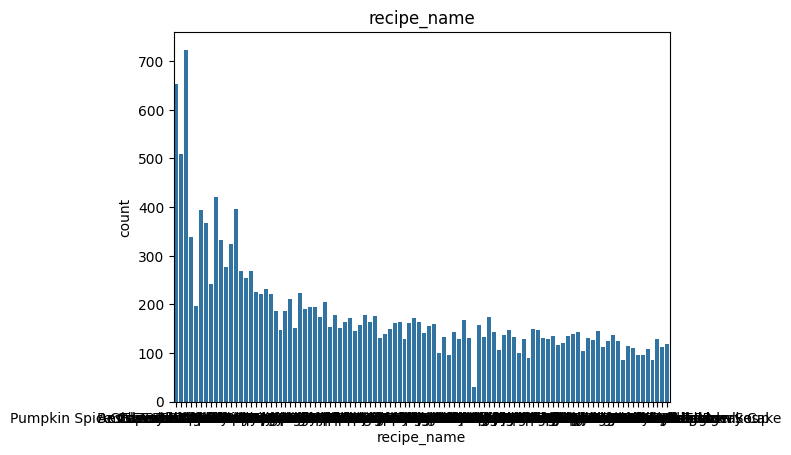

In [59]:
sns.countplot(data=df, x='recipe_name')
plt.title('recipe_name')
plt.show()

***Initial Insights**


From the initial data exploration:

The dataset contains 18180 rows and 15 columns.
Several features are categorical and numerical.
The target variable, 'Star', is a categorical feature with reviews as positive, neutral, or negative.

In [60]:
#Summary statistics of the dataset
df.describe()

,Unnamed: 0,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score
count,18180.000000,18180.000000,18180.000000,18180.000000,1.818000e+04,18180.000000,18180.000000,18180.000000,18180.000000,18180.000000
mean,121.443289,38.693124,21774.727283,2.159736,1.623711e+09,0.014631,1.089384,0.549395,4.288724,153.167987
std,116.735220,29.786123,23966.015985,10.015210,5.468988e+06,0.137981,4.201219,3.470310,1.544853,141.081974
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,150.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,520.000000,1.665756e+09,3.000000,106.000000,126.000000,5.000000,946.000000


In [61]:
#Summary statistics of categorical data
df.describe(include = 'object')

,recipe_name,comment_id,user_id,user_name,text
count,18180,18180,18180,18180,18180
unique,100,18180,13812,13586,17731
top,Cheeseburger Soup,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_1oKVZzipo1u8lcqQzDUcw4UBn9e,2124arizona,Delicious!
freq,724,1,25,28,14


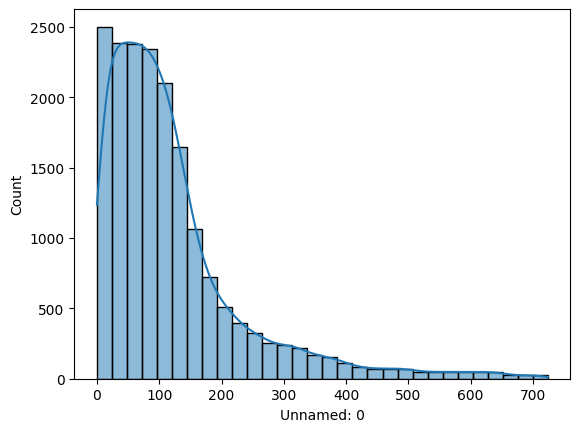

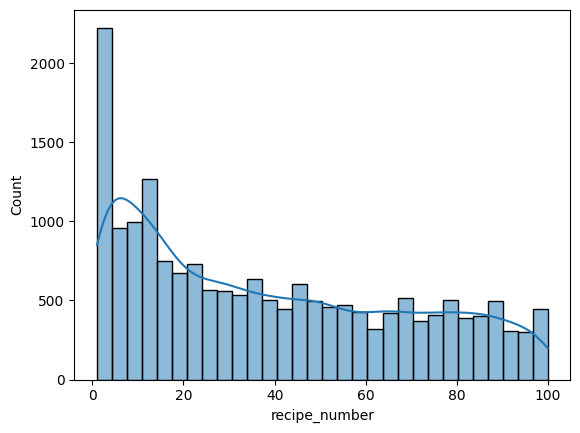

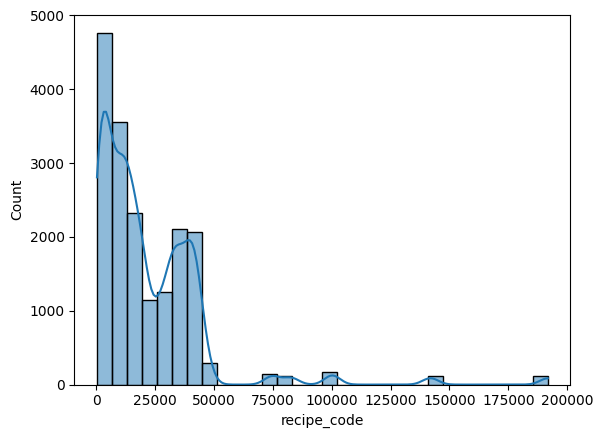

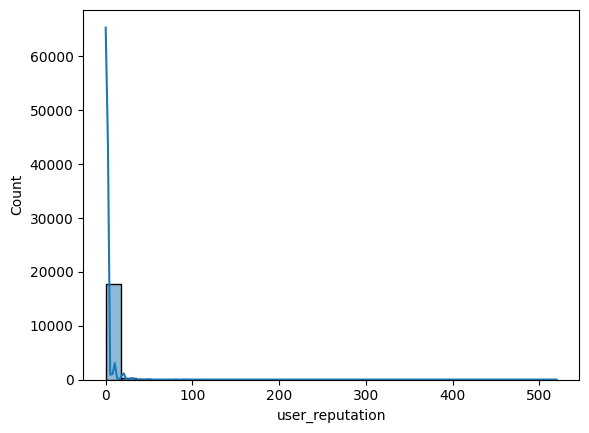

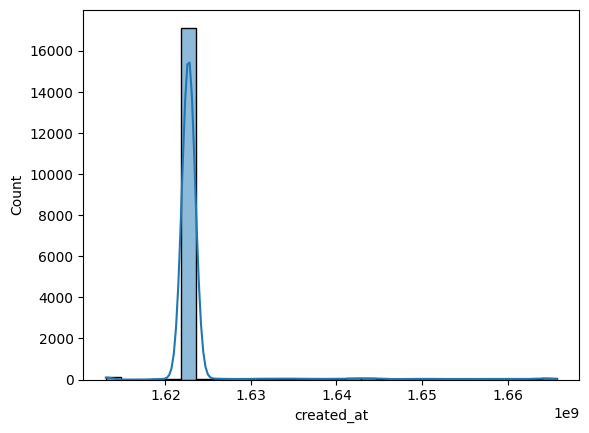

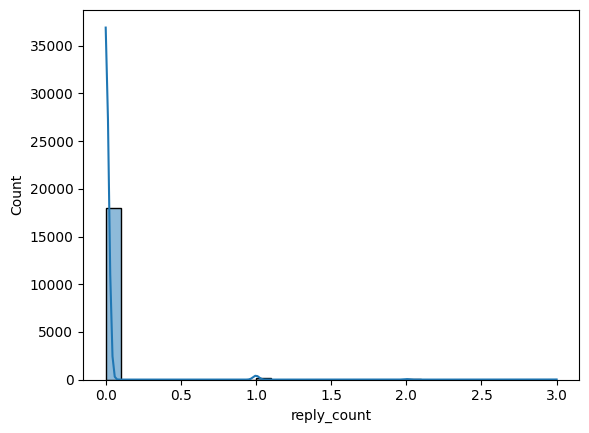

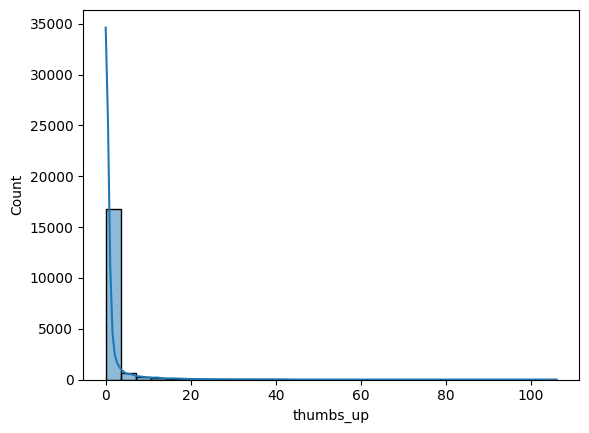

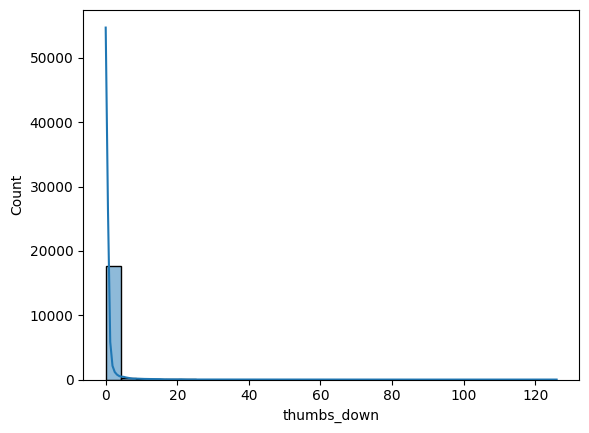

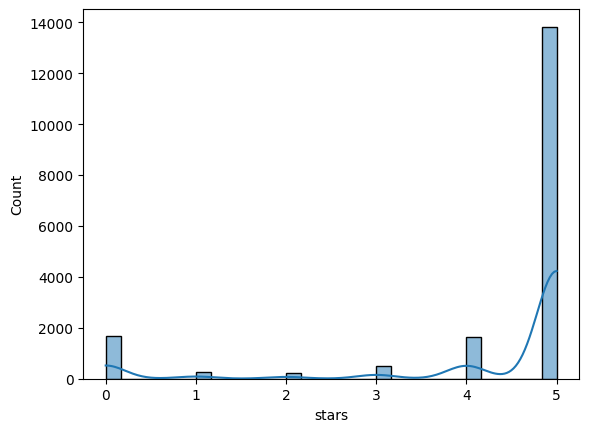

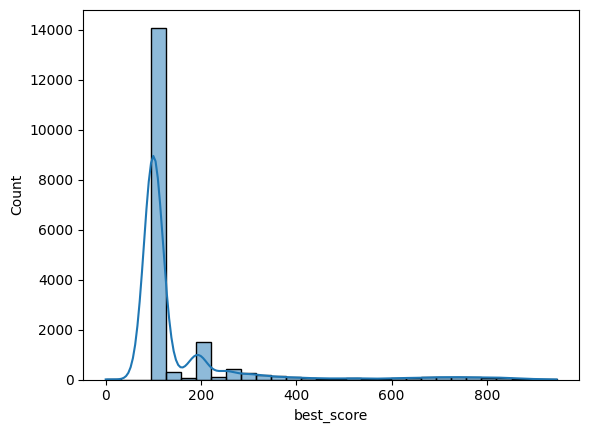

In [62]:
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i,bins=30,kde='True')
  plt.show()